Group 14

- Francisco Santos, 20240562 

- Margarida Raposo, 20241020 

- Nuno Nunes, 20240560 

- Teresa Menezes, 20240333 

# Imports 

In [29]:
import pandas as pd
import numpy as np

# import matplotlib.pyplot and seaborn for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

import os
from math import ceil

from scipy import stats

import warnings

# Data Set Information:
**customer_id** - Unique identifier for each customer.

**customer_region** - Geographic region where the customer is located.

**customer_age** - Age of the customer.

**vendor_count** - Number of unique vendors the customer has ordered from.

**product_count** - Total number of products the customer has ordered.

**is_chain** - Indicates whether the customer’s order was from a chain restaurant.

**first_order** - Number of days from the start of the dataset when the customer first placed an order.

**last_order** - Number of days from the start of the dataset when the customer most recently placed an order.

**last_promo** - The category of the promotion or discount most recently used by the customer.

**payment_method** - Method most recently used by the customer to pay for their orders.

**CUI_American, CUI_Asian, CUI_Chinese, CUI_Italian, etc.** - The amount in monetary units spent by the customer from the indicated type of cuisine.

**DOW_0toDOW_6** - Number of orders placed on each day of the week (0 =Sunday, 6 =Saturday).

**HR_0toHR_23** - Number of orders placed during each hour of the day (0 =midnight, 23 = 11 PM).

In [30]:
# load the dataset and display the first few rows
df = pd.read_csv('DM2425_ABCDEats_DATASET.csv', sep=',')
df.head()

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
0,1b8f824d5e,2360,18.0,2,5,1,0.0,1,DELIVERY,DIGI,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,28.88,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0
1,5d272b9dcb,8670,17.0,2,2,2,0.0,1,DISCOUNT,DIGI,12.82,6.39,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
2,f6d1b2ba63,4660,38.0,1,2,2,0.0,1,DISCOUNT,CASH,9.20,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,180c632ed8,4660,NaN,2,3,1,0.0,2,DELIVERY,DIGI,0.00,13.70,0.0,0.0,0.0,0.0,0.0,0.0,17.86,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
4,4eb37a6705,4660,20.0,2,5,0,0.0,2,-,DIGI,14.57,40.87,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1,0.0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [31]:
# display the information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31888 entries, 0 to 31887
Data columns (total 56 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               31888 non-null  object 
 1   customer_region           31888 non-null  object 
 2   customer_age              31161 non-null  float64
 3   vendor_count              31888 non-null  int64  
 4   product_count             31888 non-null  int64  
 5   is_chain                  31888 non-null  int64  
 6   first_order               31782 non-null  float64
 7   last_order                31888 non-null  int64  
 8   last_promo                31888 non-null  object 
 9   payment_method            31888 non-null  object 
 10  CUI_American              31888 non-null  float64
 11  CUI_Asian                 31888 non-null  float64
 12  CUI_Beverages             31888 non-null  float64
 13  CUI_Cafe                  31888 non-null  float64
 14  CUI_Ch

In [32]:
# check for missing values
df.isna().sum()

customer_id                    0
customer_region                0
customer_age                 727
vendor_count                   0
product_count                  0
is_chain                       0
first_order                  106
last_order                     0
last_promo                     0
payment_method                 0
CUI_American                   0
CUI_Asian                      0
CUI_Beverages                  0
CUI_Cafe                       0
CUI_Chicken Dishes             0
CUI_Chinese                    0
CUI_Desserts                   0
CUI_Healthy                    0
CUI_Indian                     0
CUI_Italian                    0
CUI_Japanese                   0
CUI_Noodle Dishes              0
CUI_OTHER                      0
CUI_Street Food / Snacks       0
CUI_Thai                       0
DOW_0                          0
DOW_1                          0
DOW_2                          0
DOW_3                          0
DOW_4                          0
DOW_5     

In [33]:
# set the customer_id as the index
df.set_index('customer_id', inplace= True)

In [34]:
# drop duplicates rows 
df.drop_duplicates(inplace=True)
# check for duplicates
df.duplicated().sum()

0

In [35]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df.describe()

,customer_age,vendor_count,product_count,is_chain,first_order,last_order,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
count,31101.000000,31828.000000,31828.000000,31828.000000,31722.000000,31828.00000,31828.000000,31828.000000,31828.000000,31828.000000,31828.000000,31828.000000,31828.000000,31828.000000,31828.000000,31828.000000,31828.000000,31828.000000,31828.000000,31828.000000,31828.000000,31828.000000,31828.000000,31828.000000,31828.000000,31828.000000,31828.000000,31828.000000,30664.0,31828.000000,31828.000000,31828.000000,31828.000000,31828.000000,31828.000000,31828.000000,31828.000000,31828.000000,31828.000000,31828.000000,31828.000000,31828.000000,31828.000000,31828.000000,31828.000000,31828.000000,31828.000000,31828.000000,31828.000000,31828.000000,31828.000000,31828.000000
mean,27.508376,3.102645,5.668248,2.819467,28.462329,63.66674,4.878717,9.959460,2.296773,0.802162,0.768990,1.431904,0.884069,0.951931,1.630242,3.234723,2.993057,0.712701,3.002839,3.906958,0.841754,0.555894,0.567771,0.590801,0.619297,0.677957,0.652947,0.704254,0.0,0.053726,0.063183,0.118386,0.101609,0.081846,0.069718,0.076756,0.131928,0.234259,0.329615,0.378315,0.314252,0.236333,0.215408,0.276957,0.356321,0.391102,0.337125,0.245853,0.142799,0.071227,0.048228,0.045212
std,7.164141,2.772111,6.957506,3.977932,24.101334,23.23167,11.652854,23.571343,8.470691,6.432826,3.660007,8.196175,5.257256,5.835936,7.443219,11.253846,10.182749,4.540379,9.775722,15.522462,4.435322,1.013460,1.044383,1.045672,1.069931,1.088231,1.069820,1.167516,0.0,0.316398,0.351663,0.497201,0.437411,0.358645,0.329540,0.377581,0.635979,0.725483,0.890932,0.960065,0.842833,0.637145,0.598255,0.738367,0.874181,0.944256,0.894446,0.795864,0.586876,0.348773,0.298032,0.282163
min,15.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,1.000000,2.000000,1.000000,7.000000,49.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,2.000000,3.000000,2.000000,22.000000,70.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,31.000000,4.000000,7.000000,3.000000,45.000000,83.00000,5.660000,11.830000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,80.000000,41.000000,269.000000,83.000000,90.000000,90.

### Remarks
- HR_0 only has 0 values
- HR_11 & HR_17 representing 11am and 5pm, respectively, are the hours of the day when, on average, consumers order more
- HR_22 to HR_1 representing 10pm to 1am, are the hours of the day when, on average, consumers order less<br/>
<br/>
- DOW_4 & DOW_6 representing Thursday and Saturday, are the days of the week when, on average, consumers order more
- DOW_0 & DOW_1 representing Sunday and Mondauy, are the days of the week when, on average, consumers order less<br/>
<br/>
**Missing values**: The variables "customer_age", "first_order" and " HR_0" have missing values<br/>
For all rows with missing values in "first_order", the corresponding value in the feature "last_order" is 0, meaning **the customer didn't place an order during the data collection period**.


In [36]:
# select columns representing orders per hour (HR_0 to HR_23)
orders_per_hour = df.loc[:, 'HR_0':'HR_23']

# calculate the total number of orders for different times of the day
dawn = sum(df.loc[:, 'HR_0':'HR_6'].sum())  # Sum of orders from 12 AM to 6 AM
morning = sum(df.loc[:, 'HR_7':'HR_12'].sum())  # Sum of orders from 7 AM to 12 PM
afternoon = sum(df.loc[:, 'HR_13':'HR_18'].sum())  # Sum of orders from 1 PM to 6 PM
night = sum(df.loc[:, 'HR_19':'HR_23'].sum())  # Sum of orders from 7 PM to 11 PM

# organize total orders for each time of the day in a list
orders_per_moment_of_day = [dawn, morning, afternoon, night]

# select columns representing orders per day of the week (DOW_0 to DOW_6)
orders_per_dow = df.loc[:, 'DOW_0':'DOW_6']

# calculate the sum of orders for each day of the week
orders_per_dow_sum = orders_per_dow.sum()

# select columns representing the amount spent per cuisine type (CUI_American to CUI_Thai)
amount_spent_per_cuisine = df.loc[:, 'CUI_American':'CUI_Thai']

# calculate the sum of the amount spent for each cuisine type
amount_spent_per_cuisine_sum = amount_spent_per_cuisine.sum()

In [37]:
# split data into metric and non metric
df_non_metric = df.select_dtypes(include=['object'])
df_metric = df.select_dtypes(include=['int64', 'float64'])

# Exploratory Data Analysis

## Metric Data

In [38]:
# identify the metric features without the orders_per_dow, amount_spent_per_cuisine and orders_per_hour
metric_features = df.columns.drop(df_non_metric.columns).drop(orders_per_dow).drop(amount_spent_per_cuisine).drop(orders_per_hour).to_list()

print(metric_features)

['customer_age', 'vendor_count', 'product_count', 'is_chain', 'first_order', 'last_order']


## Metric Data Histogram

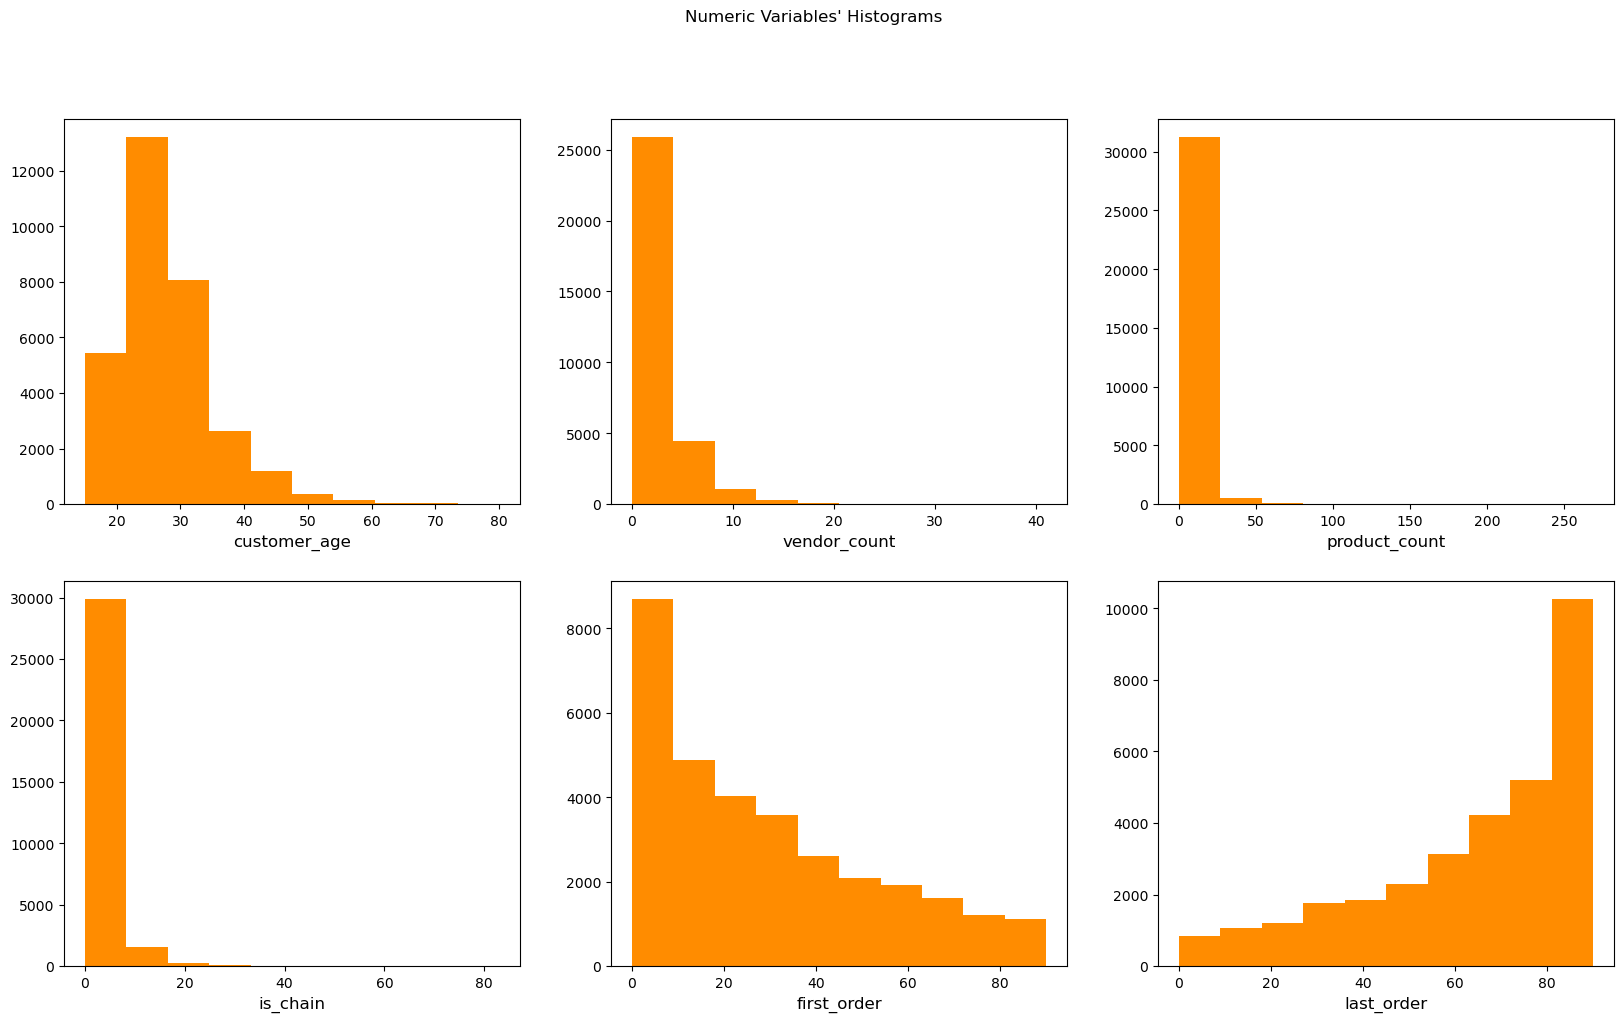

In [39]:
# define number of rows and columns for the subplots
sp_rows = 2
sp_cols = 3

# create a figure with subplots
fig, axes = plt.subplots(sp_rows, 
                         sp_cols, 
                         figsize=(20, 11))

# iterate over each axis and metric feature to plot histograms
for ax, feat in zip(axes.flatten(), metric_features): # notice the zip() function and flatten() method - creates one list with all the axes
    ax.hist(df[feat], color='darkorange') # histogram for each feature
    ax.set_title(feat, y=-0.13) # title for each subplot

# set the title for the figure
title = "Numeric Variables' Histograms"

plt.suptitle(title)

plt.show()

### Histogram - Remarks

- By visualizing their histograms, the features *first_order* and *last_order* seem to be **correlated**, due to their plots' symmetry. <br/>
- The features *vendor_count*,*product_count* and *is_chain* seem to have **outliers that limit the visualization** of their distribution.<br/> 
- The feature *customer_age* might have some less accentuated outliers, but seems to have a **right-skewed distribution** - meaning that customers show a tendency to young adults.

## Metric Data Boxplot

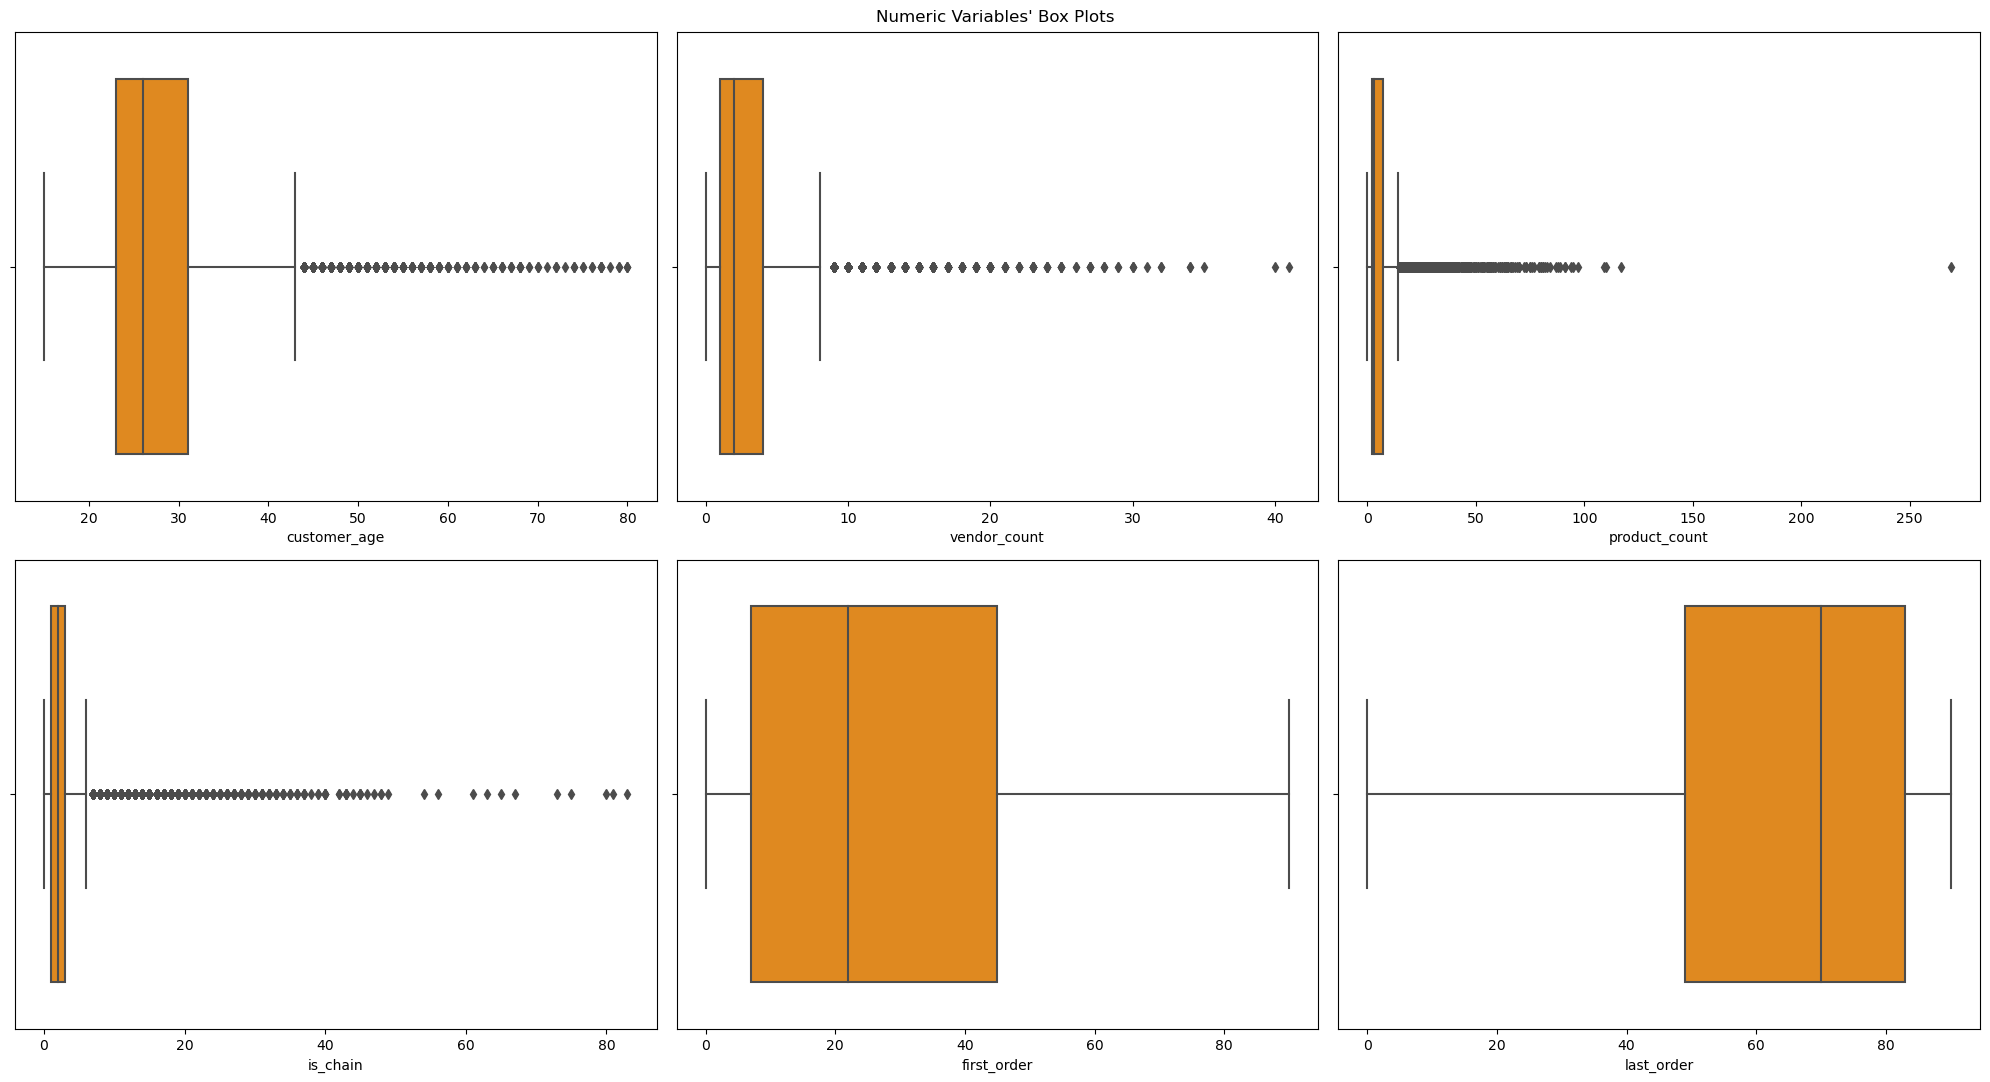

In [40]:
# define number of rows and columns for the subplots
sp_rows = 2
sp_cols = ceil(len(metric_features) / sp_rows)

# create a figure with subplots
fig, axes = plt.subplots(sp_rows, 
                         sp_cols, 
                         figsize=(20, 11),
                         tight_layout=True
                        )

# iterate over each axis and metric feature to plot box plots
for ax, feat in zip(axes.flatten(), metric_features):
    sns.boxplot(x=df[feat], ax=ax, color='darkorange') # boxplot for each feature

# set the title for the figure
title = "Numeric Variables' Box Plots"

plt.suptitle(title)

plt.show()

### Boxplot - Remarks

- Once again, the features *first_order* and *last_order* have highly symmetrical plots, which might indicate **correlation** between them. <br/>
- As suspected, the features *vendor_count*,*product_count* and *is_chain* have a **elevated number of outliers**, that should be dealt with in order to visualize the features distribution. <br/>
- (WHAT SHOULD WE DO WITH THE OUTLIERS OF CUSTOMER AGE- by taking them off we might be biasing the data)

In [41]:
# check for unique values in the 'is_chain' column
df['is_chain'].unique()

array([ 1,  2,  0,  3,  5,  4,  7, 12,  6, 23,  8, 11, 20, 14,  9, 10, 16,
       15, 13, 25, 17, 27, 30, 32, 24, 18, 26, 28, 22, 40, 31, 39, 21, 37,
       19, 33, 65, 38, 29, 45, 47, 73, 81, 56, 35, 46, 67, 44, 61, 34, 36,
       49, 83, 75, 43, 42, 48, 63, 54, 80], dtype=int64)

In [42]:
# check for customers with no orders by summing the orders per day of the week
# if the sum is zero, then the customer has no orders
no_orders = df.loc[:, 'DOW_0':'DOW_6'].sum(axis=1) == 0
no_orders = df[no_orders]
len(no_orders)

138

- 138 customers have not ordered in this period

## Metric Data Correlation Matrix

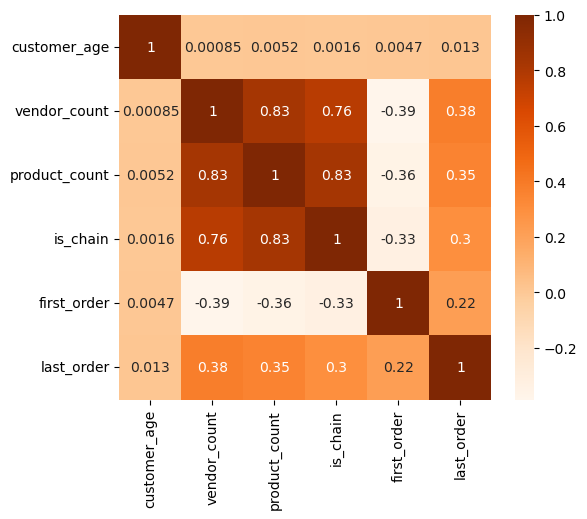

In [43]:
# create a figure with a specified size
fig = plt.figure(figsize=(6, 5))

# calculate the Pearson correlation matrix for the metric features
corr = df[metric_features].corr(method="pearson")

# create a heatmap to visualize the correlation matrix
sns.heatmap(data=corr, annot=True, cmap='Oranges')

plt.show()

### Correlation Matrix - Remarks
- The feature *product_count* is highly correlated to *vendor_count* and *is_chain*, thus it is a good candidate to be dropped from the dataset. <br/>
- Depending on the redundancy treeshold considered, *vendour_count* and *is_chain* can be also considered highly correlated. If the treeshold considered is bellow to 0.76, one of the named features would be dropped from the dataset.

### Days of the Week 

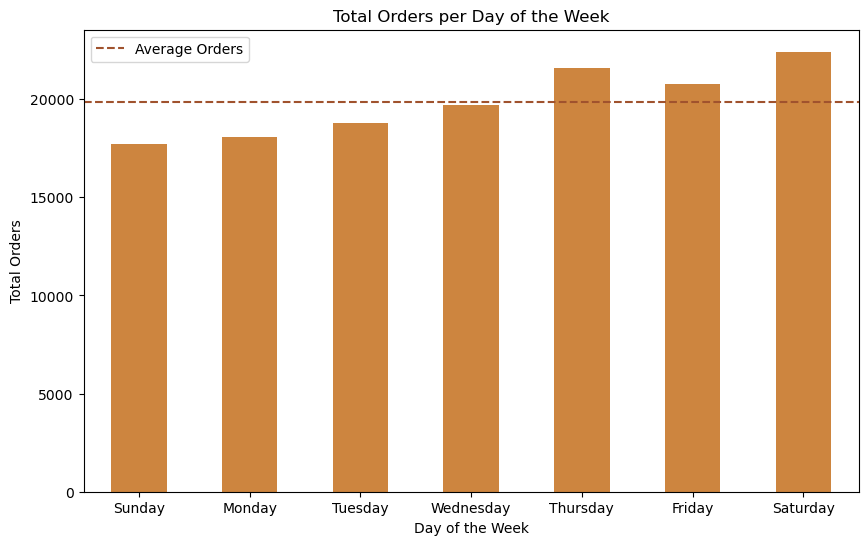

In [44]:
# calculate the average number of orders per day of the week
average_orders_dow = orders_per_dow_sum.mean()

# list of days of the week 
list_day_of_week = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

plt.figure(figsize=(10, 6))

# plot the total orders per day of the week as a bar chart
orders_per_dow_sum.plot(kind='bar', color = 'peru')
plt.xticks(ticks=range(len(list_day_of_week)), labels=list_day_of_week, rotation=0)
plt.axhline(y=average_orders_dow, color='sienna', linestyle='--', label='Average Orders')
plt.title('Total Orders per Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Orders')
plt.xticks(rotation=0)
plt.legend()
plt.show()



### Days of the Week - Remarks
- The total number of orders per day of the week does not have a high disparity, as we can observe in the graph.
- We decided to compare it to the mean, approximately 19,902 orders per day of the week. This comparison allows us to identify days that fall below it and those that meet or exceed it.
- For example, from Thursday to Saturday, the number of orders exceeds the average, while the rest of the days fall below it. Unexpectedly, Sunday has the lowest order count of the week.

### Moments of the day

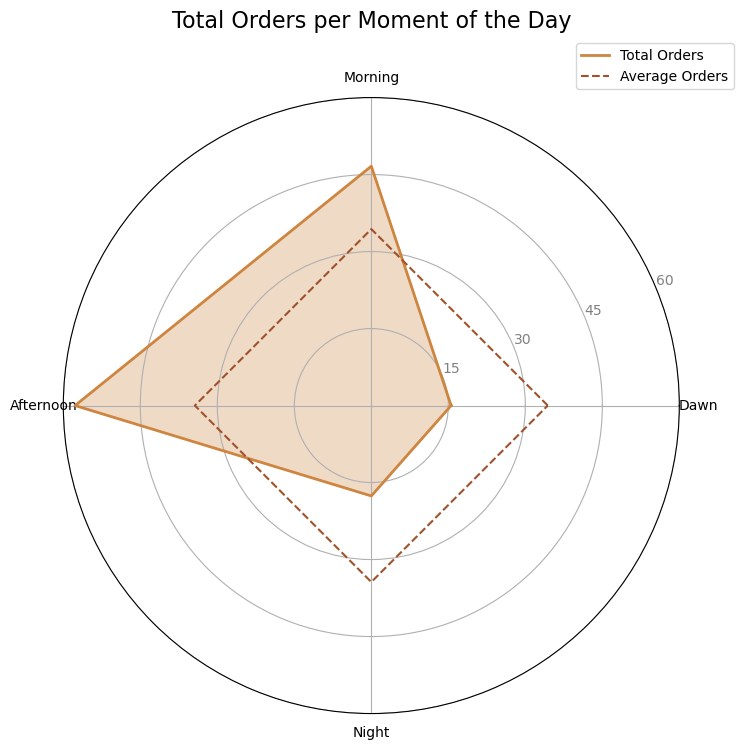

In [45]:
# moments of the day
moments_of_day = ['Dawn', 'Morning', 'Afternoon', 'Night']

# save the average number of orders per moment of the day, respectively
orders_per_moment_of_day = [15.547, 46.632, 57.712, 17.611] 

# calculate the average number of orders per moment of the day
average_orders_moment = sum(orders_per_moment_of_day) / len(orders_per_moment_of_day)

# calculate the angles for the radar chart
angles = np.linspace(0, 2 * np.pi, len(moments_of_day), endpoint=False).tolist()

# complete the loop for the radar chart by appending the first value to the end
orders_per_moment_of_day += orders_per_moment_of_day[:1] 
angles += angles[:1] 

# polar subplot
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# plot the total orders per moment of the day
ax.plot(angles, orders_per_moment_of_day, color='peru', linewidth=2, label='Total Orders')

# fill the area under the plot
ax.fill(angles, orders_per_moment_of_day, color='peru', alpha=0.3)

# plot the average orders as a dashed line
ax.plot(angles, [average_orders_moment] * len(angles), color='sienna', linestyle='--', label='Average Orders')

# x-ticks to represent the moments of the day
ax.set_xticks(angles[:-1])  
ax.set_xticklabels(moments_of_day)  

# set y-ticks and labels
ax.set_yticks([15, 30, 45, 60])  
ax.set_yticklabels(['15', '30', '45', '60'], color="grey", size=10) 
 
plt.title('Total Orders per Moment of the Day', size=16, y=1.1)
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))
plt.show()


### Moments of the Day - Remarks
- We defined each time segment as follows: Dawn (midnight to 6a.m.), Morning (7a.m. to 12p.m.), Afternoon (1p.m. to 6p.m.), and Night (7p.m. to 11p.m.). 
- The values used on the graph are in thousands. 
- Once again, we used the average to compare with the different moments of the day.
- With a mean of the orders is 34,440 per moment of the day, both morning (46,632 orders) and afternoon (57,712 orders) show higher order volumes, with the afternoon having the highest order count. 
- As expected, order counts are low during dawn (15,547 orders), however, they are also unexpectedly low at night (17,611 orders).

### Cuisines

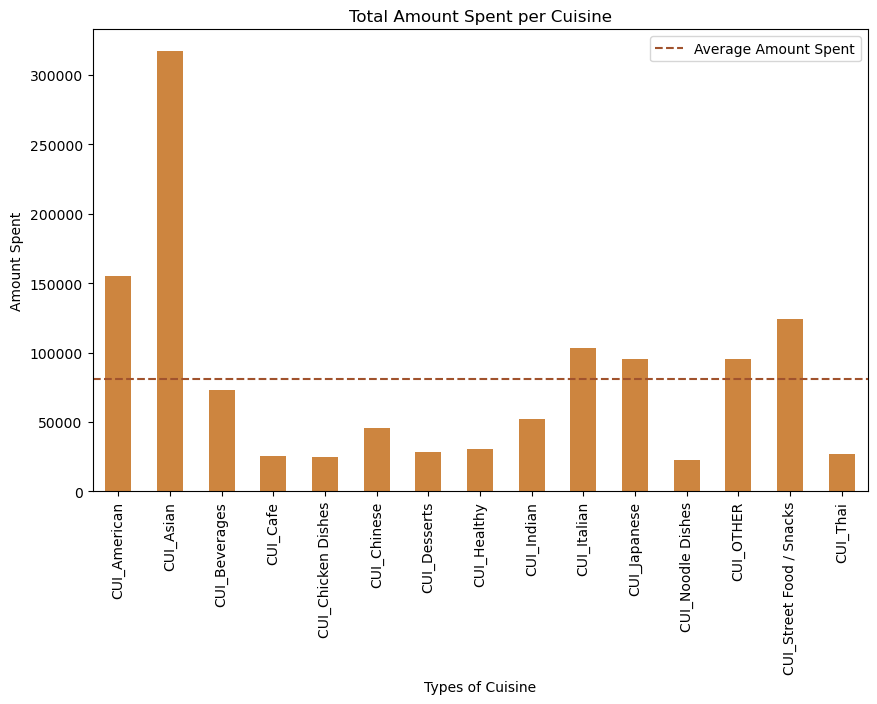

In [46]:
# calculate the average amount spent per cuisine type
average_amount_spent_per_cuisine = amount_spent_per_cuisine_sum.mean()

plt.figure(figsize=(10, 6))

# plot the total amount spent per cuisine type as a bar chart
amount_spent_per_cuisine_sum.plot(kind='bar', color='peru')

# add a horizontal line representing the average amount spent
plt.axhline(y=average_amount_spent_per_cuisine, color='sienna', linestyle='--', label='Average Amount Spent')
plt.title('Total Amount Spent per Cuisine')
plt.xlabel('Types of Cuisine')
plt.ylabel('Amount Spent') 
plt.legend()
plt.show()

In [47]:
# calculate the average amount spent per cuisine type
df.loc[:, 'CUI_American':'CUI_Thai'].sum()

CUI_American                155279.79
CUI_Asian                   316989.68
CUI_Beverages                73101.70
CUI_Cafe                     25531.20
CUI_Chicken Dishes           24475.42
CUI_Chinese                  45574.64
CUI_Desserts                 28138.16
CUI_Healthy                  30298.05
CUI_Indian                   51887.35
CUI_Italian                 102954.76
CUI_Japanese                 95263.02
CUI_Noodle Dishes            22683.85
CUI_OTHER                    95574.36
CUI_Street Food / Snacks    124350.67
CUI_Thai                     26791.35
dtype: float64

### Cuisines - Remarks

- On average, the amount in monetary units spent by customers on each type of cuisine is around 81,427. However, the graph highlights significant differences in spending among various cuisines.
- Asian food has the largest consumer spending, with a noticeable difference when compared to American food, which comes in second. In terms of consumer spending, Street Food / Snacks comes in third place.
- The cuisines with the lowest customer spending include Cafe, Chicken Dishes, Noodle Dishes, and Thai. The spending for other cuisines is closer to the average.

## Non Metric Data

In [48]:
# save the names of non-metric features in a list
non_metric_features = df_non_metric.columns.to_list()

In [49]:
# check first 5 rows of non-metric features
df_non_metric.head(5)

,customer_region,last_promo,payment_method
customer_id,,,
1b8f824d5e,2360,DELIVERY,DIGI
5d272b9dcb,8670,DISCOUNT,DIGI
f6d1b2ba63,4660,DISCOUNT,CASH
180c632ed8,4660,DELIVERY,DIGI
4eb37a6705,4660,-,DIGI


### Basic Statistics

In [50]:
# empty list to store the statistics of non-metric features
cat_stats_list = []

for col in df_non_metric.columns:
    tmp_dict = {
        'column': col, # column name
        'values': df_non_metric[col].unique(), # unique values
        'values_count': len(df_non_metric[col].unique()), # number of unique values
        'values_count_nona': int(df_non_metric[col].nunique()), # number of unique values without missing values
        'mode': df_non_metric[col].mode().values[0], # mode
        'num_miss': df_non_metric[col].isnull().sum(), # number of missing values
        'pct_miss': (df_non_metric[col].isnull().sum() / len(df_non_metric)).round(2) * 100 # % of missing values
    }
    
    cat_stats_list.append(tmp_dict)

ds_cat_stats = pd.DataFrame(cat_stats_list)
ds_cat_stats


,column,values,values_count,values_count_nona,mode,num_miss,pct_miss
0,customer_region,"[2360, 8670, 4660, 2440, -, 4140, 2490, 8370, ...",9,9,8670,0,0.0
1,last_promo,"[DELIVERY, DISCOUNT, -, FREEBIE]",4,4,-,0,0.0
2,payment_method,"[DIGI, CASH, CARD]",3,3,CARD,0,0.0


### Basic Statistics - Remarks
- Customer_region has a lot of different categories (8).
- More than half of last_promo values are missing - probably did not use any discount.
- Is DIGI payment method useful?

### Frequency Distribution

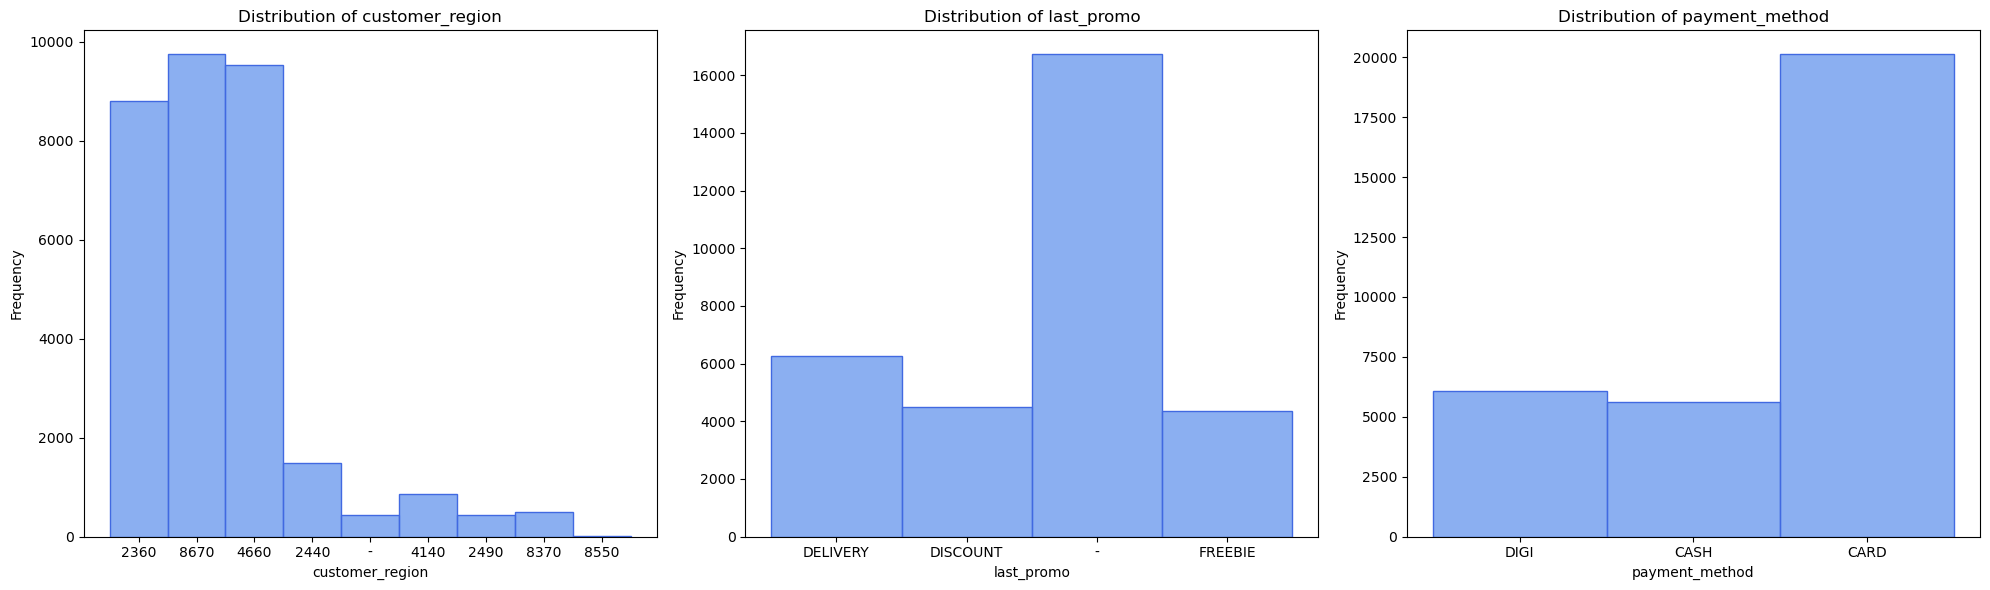

In [51]:
# select the non-metric features
features = df_non_metric.columns 

# figure with 3 subplots in a single row
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# iterate over each axis and feature to plot histograms
for ax, feat in zip(axes, features[:3]):  # limit to the first 3 features
    sns.histplot(df_non_metric[feat].dropna(), kde=False, ax=ax, color='cornflowerblue', edgecolor='royalblue')
    ax.set_title(f'Distribution of {feat}')
    ax.set_xlabel(feat)
    ax.set_ylabel('Frequency')
    ax.grid(False)  # remove grid

plt.tight_layout()
plt.show()

### Frequency Distribution - Remarks
- Customer Region (top left):
There is a heavy concentration in regions 2360, 8670, and 4660, each with around 9,000 to 10,000 entries.
Region 2440 and others have much smaller counts.
There is a category labeled "-" that might represent missing or unknown values.

- Last Promo (top right):
The majority of entries are missing or unspecified, represented by "-".
"DELIVERY" and "DISCOUNT" promotions have significant counts, with "FREEBIE" being less common.
This distribution may indicate the primary promo types or highlight a need to address missing promo data.

- Payment Method (bottom left):
"CARD" is the most used payment method, followed by "DIGI" (possibly digital) and "CASH."
This distribution suggests that card payments are preferred, while cash is the least common.

### New Feature

In [52]:
# Mapping for customer_region to customer_cities
region_to_city = {
    '2360': '2',
    '8670': '8',
    '4660': '4',
    '2440': '2',
    '-': '8',
    '4140': '4',
    '2490': '2',
    '8370': '8',
    '8550': '8'}

# Create a new feature named 'customer_cities', which maps the customer_region to the respective city
df['customer_city'] = df['customer_region'].map(region_to_city)

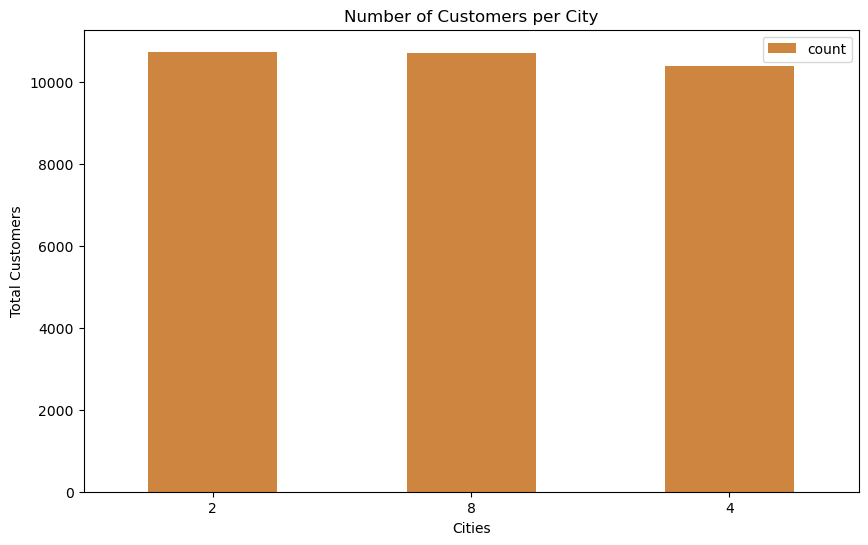

In [53]:
plt.figure(figsize=(10, 6))

# plot customer per city as a bar chart
customers_per_city = df['customer_city'].value_counts()
customers_per_city.plot(kind='bar', color = 'peru')

plt.title('Number of Customers per City')
plt.xlabel('Cities')
plt.ylabel('Total Customers')
plt.xticks(rotation=0)

plt.legend()
plt.show()

## Bivariate and Multivariate Analysis

### Customer Age Distribution per Region 
Is there a significant age gap between regions?

  customer_region  customer_age
7            8550     25.000000
0               -     27.095455
3            2490     27.210526
1            2360     27.473531
8            8670     27.513953
5            4660     27.529355
2            2440     27.628709
4            4140     27.657074
6            8370     27.708678


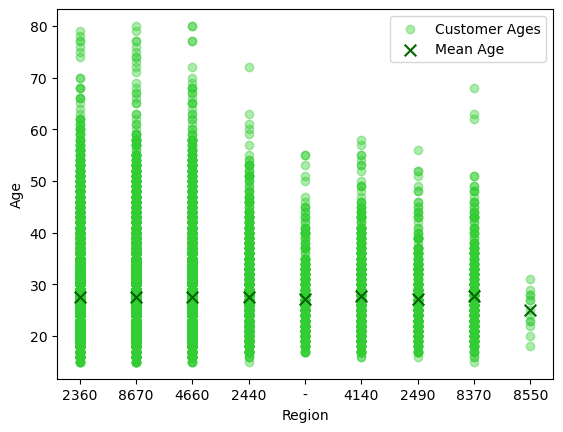

In [54]:
# calculate the mean age per customer region and reset the index
mean_ages_per_region = df.groupby('customer_region')['customer_age'].mean().reset_index()
print(mean_ages_per_region.sort_values(by='customer_age'))

# scatter plot of customer age per region
plt.scatter(df["customer_region"], df["customer_age"], alpha=0.4, label='Customer Ages', color='limegreen')
plt.ylabel("Age")
plt.xlabel("Region")

plt.scatter(mean_ages_per_region["customer_region"], mean_ages_per_region["customer_age"], color='darkgreen', marker='x', s=70, label='Mean Age')

plt.legend()
plt.show()

### Vendor Count per Customer Region
Are customers open to try different restaurants?

  customer_region  vendor_count
4            4140      1.803738
6            8370      2.143434
0               -      2.821267
5            4660      2.826078
7            8550      2.846154
8            8670      2.906853
3            2490      3.310811
2            2440      3.698381
1            2360      3.702099


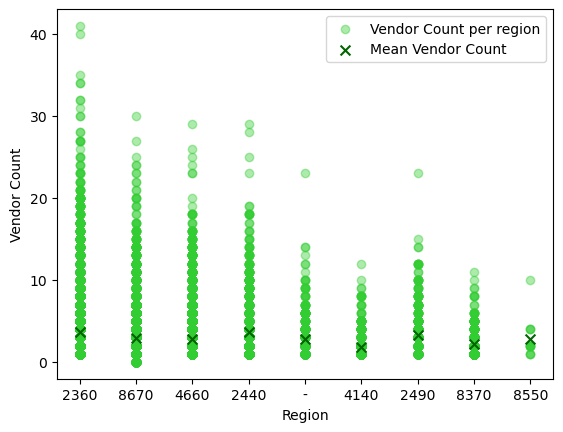

In [55]:
# calculate the mean vendor count per customer region and reset the index
vendor_per_region = df.groupby('customer_region')['vendor_count'].mean().reset_index()
print(vendor_per_region.sort_values(by='vendor_count'))

# plot the vendor count per region
plt.scatter(df["customer_region"], df["vendor_count"], alpha=0.4, label='Vendor Count per region', color='limegreen')
plt.ylabel("Vendor Count")
plt.xlabel("Region")

plt.scatter(vendor_per_region["customer_region"], vendor_per_region["vendor_count"], color='darkgreen', marker='x', s=50, label='Mean Vendor Count')

plt.legend()
plt.show()

### Remarks
- Even though the difference is not immense, the two oldest regions have a tendency to be more conservative in their choices of vendors, not beting as much in variety.
- The regions starting with a '2' (2490, 2440, 2360), are clearly **varying more than others**, might they be close to each other or related in any other way? (the data was collected from three cities, is the initial number representing this?)
- Vendor count seems to be more correlated with region than with age.

### Average Spending per Cuisine, per Region

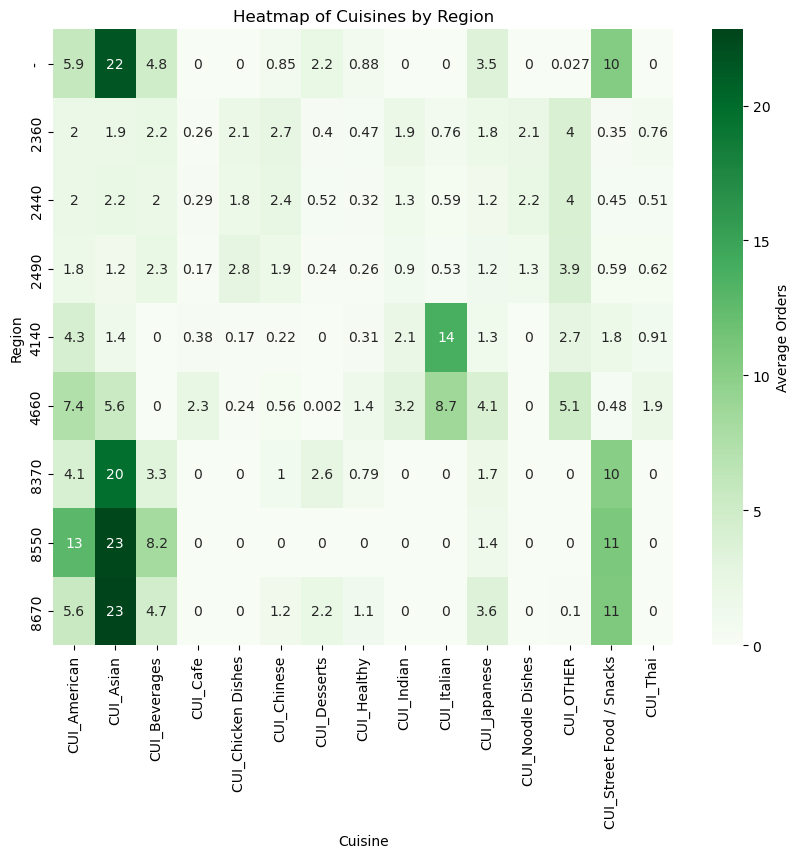

In [56]:
# calculate the mean amount spent per cuisine for each customer region
cuisine_per_region = df.groupby('customer_region')[amount_spent_per_cuisine.columns.tolist()].mean()

plt.figure(figsize=(10, 8))  

# create a heatmap to visualize the average amount spent per cuisine by region
sns.heatmap(cuisine_per_region, annot=True, cmap="Greens", cbar_kws={'label': 'Average Orders'})

plt.title('Heatmap of Cuisines by Region')
plt.xlabel('Cuisine')
plt.ylabel('Region')

plt.show()

### Remarks
- Customers in the **'2' regions** spend more on 'CUI_OTHER', which is the overall favorite in the 3 regions of the group, followed by 'CUI_Chinese'; On the other side, 'CUI_Cafe', 'CUI_Desserts' and 'CUI_Street Food/Snacks' seem to be the overall least favorites in the region. Yet another remark can be taken from analysing the heatmap - from all 3 regions constituting the '2' regions group, one stands out as the most distinct in tastes, '2490', specially differing from '2360', while '2440' seems to be in between, leaning more towards the second. <br/>
- Customers in the **'4' regions** top 3 cuisines seem to be 'CUI_Italian', 'CUI_American' and 'CUI_OTHER'. <br/>
- Customers in the **'8' regions** show clear favoritism towards 'CUI_Asian' and CUI_Street Food/Snacks', and a slight preference for 'CUI_American' and 'CUI_Beverages'. There are a lot of null values of average orders, which may indicate lack of oppeness to diversifying or less availability of options.
- Customers in the **'-' region** seem to have **very similar preferences to the ones of the '8' regions**, and more specifically with customers from '8670', presenting the same favorites and null values.


In [57]:
# Step 1: Calculate the total amount spent by each customer
df['total_amount_spent'] = df.loc[:, 'CUI_American':'CUI_Thai'].sum(axis=1)

# Step 2: Group by 'customer_region' and calculate the mean total amount spent per region
average_spent_per_region = df.groupby('customer_region')['total_amount_spent'].mean()

# Display the result
print(average_spent_per_region)

customer_region
-       50.282511
2360    23.741234
2440    21.867476
2490    19.591351
4140    29.406121
4660    41.112974
8370    43.336626
8550    55.921538
8670    52.011055
Name: total_amount_spent, dtype: float64


In [58]:
# all customers by region
print(f"Region 2: {round(df[((df['customer_region'] == '2360') | (df['customer_region'] == '2440') | (df['customer_region'] == '2490'))]['customer_region'].value_counts().sum()/df['customer_region'].value_counts().sum()*100,2)}%")
print(f"Region 4: {round(df[((df['customer_region'] == '4660') |  (df['customer_region'] == '4140'))]['customer_region'].value_counts().sum()/df['customer_region'].value_counts().sum()*100,2)}%")
print(f"Region 8: {round(df[((df['customer_region'] == '8670') |  (df['customer_region'] == '8370') | (df['customer_region'] == '8550'))]['customer_region'].value_counts().sum()/df['customer_region'].value_counts().sum()*100,2)}%")

Region 2: 33.75%
Region 4: 32.64%
Region 8: 32.22%


According to their behavior, it migh make sense to group the customers in region '-' with those in '8670'.

### Distribution of Payment Methods by Age Group

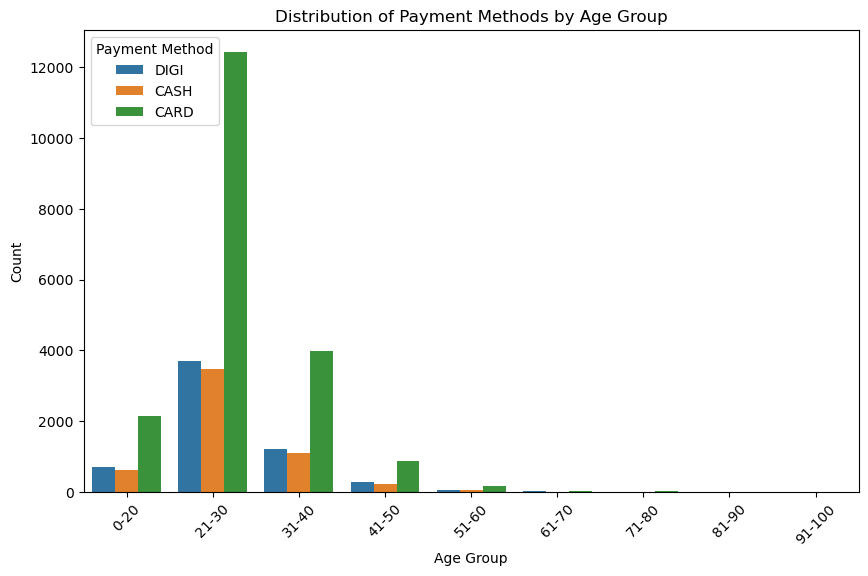

In [59]:
# Create age bins
df['age_group'] = pd.cut(df['customer_age'], bins=[0, 20, 30, 40, 50, 60, 70, 80, 90, 100], 
                         labels=['0-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100'])

# Plot the count of payment methods by age group
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='age_group', hue='payment_method')
plt.title('Distribution of Payment Methods by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Payment Method')
plt.xticks(rotation=45)
plt.show()


### Distribution of Payment Methods by Age Group - Remarks
- Use of Card is always the preferred method, specially in the 21-30 group, whereas it is important to note that for the groups 0-20 and 31-40 also show significant usage of DIGI and CASH payments, even though the card is still the preferred method.

### Customer Age Distribution by Last Promo Type

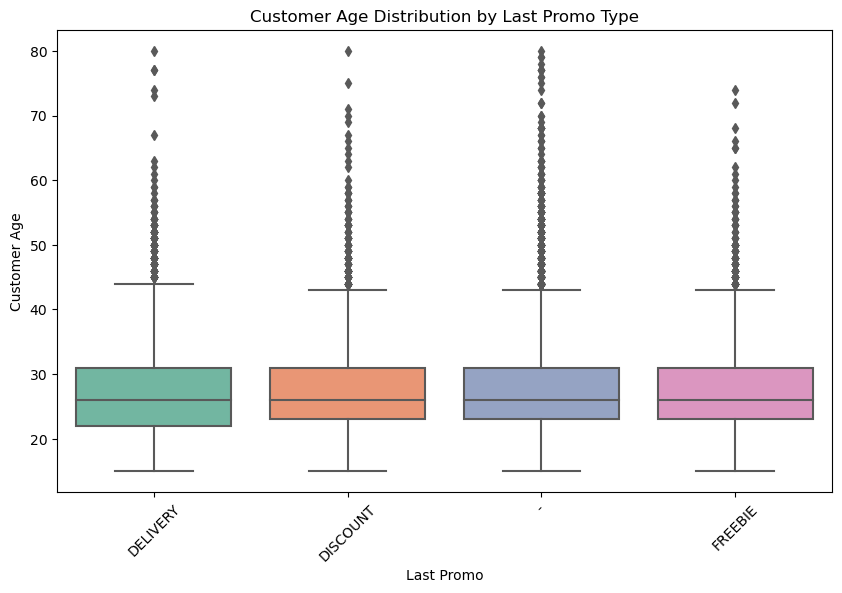

In [60]:
# Plotting a box plot of customer_age by last_promo
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='last_promo', y='customer_age', palette='Set2')
plt.title('Customer Age Distribution by Last Promo Type')
plt.xlabel('Last Promo')
plt.ylabel('Customer Age')
plt.xticks(rotation=45)
plt.show()


### Customer Age Distribution by Last Promo Type - Remarks
- Customers of all ages are represented across the promotion types, but there is a notable pattern in the "-" category.
- Elderly Presence in "-" Category: The "-" category, which likely indicates that the customer has not used any recent promotion, shows a noticeably higher concentration of elderly customers compared to other promo types like FREEBIE, DISCOUNT, or DELIVERY.
- Promotion Types: Younger customers are more evenly distributed across the DELIVERY, DISCOUNT, and FREEBIE options, while older customers tend to appear more frequently in the "-" group.


### Customer Age vs. Cuisine Preferences
- Understanding if certain age groups have a higher preference for specific cuisines can help ABCDEats target promotions or recommendations.

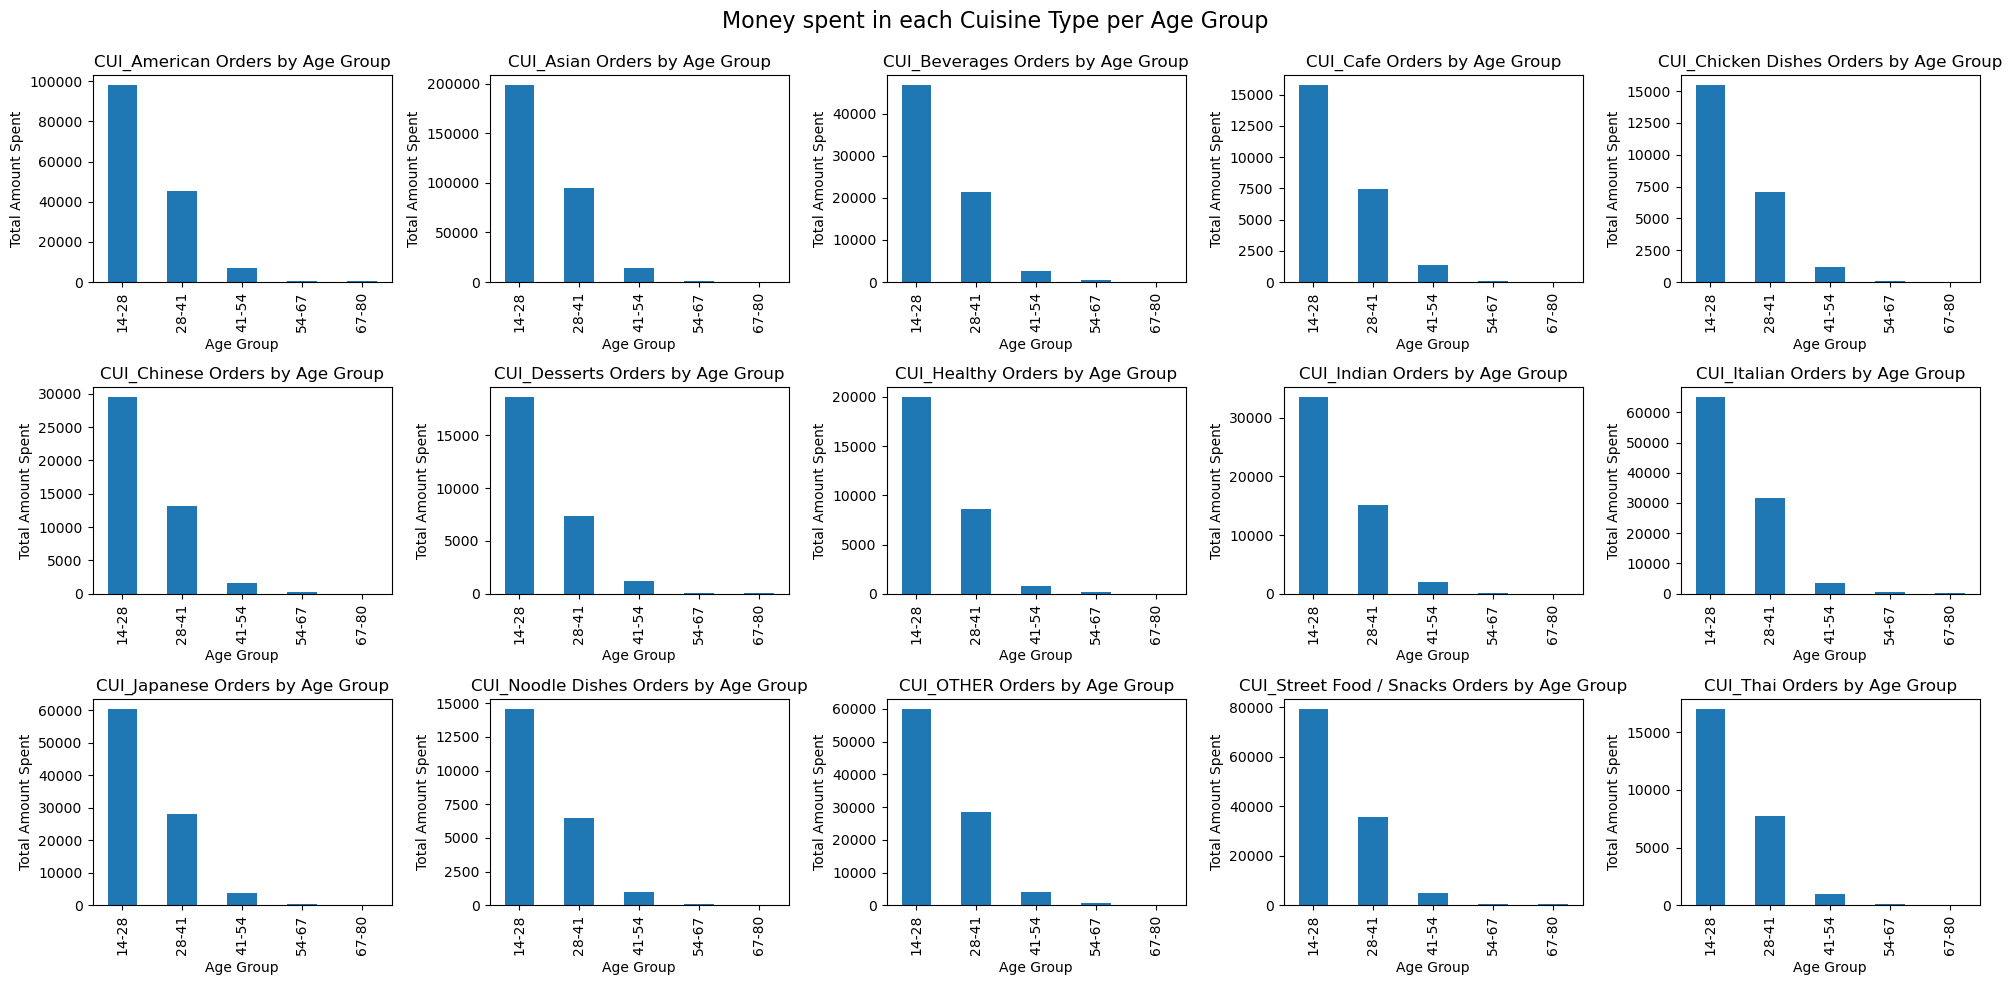

In [61]:
# ignore warnings
warnings.filterwarnings('ignore')

# create age bins by dividing the 'customer_age' column into 5 equal-sized bins
age_bins = pd.cut(df['customer_age'], bins=5)

# apply a lambda function to format the age bins as strings
age_bins = age_bins.apply(lambda x: f"{int(x.left)}-{int(x.right)}")

# get column names
cuisine_types = amount_spent_per_cuisine.columns

# figure with subplots arranged in a 3x5 grid
fig, axes = plt.subplots(3, 5, figsize=(20, 10))

for ax, cuisine in zip(axes.flatten(), cuisine_types):
    # group data by age bins and calculate the total amount spent per cuisine
    orders_per_age_group = amount_spent_per_cuisine.groupby(age_bins)[cuisine].sum()
    # plot the total amount spent per cuisine by age group
    orders_per_age_group.plot(kind='bar', ax=ax)
    ax.set_title(f'{cuisine} Orders by Age Group')
    ax.set_xlabel('Age Group')
    ax.set_ylabel('Total Amount Spent')


plt.tight_layout(rect=[0, 0, 1, 0.95]) # adjust layout to make room for the main title
plt.suptitle('Money spent in each Cuisine Type per Age Group', fontsize=16)
plt.show()


### Customer Age vs. Cuisine Preferences - Remarks
- The distribution is similar for all cuisine types.
- Age group 14-28 spent more money than the others with a significant margin for all cuisine types.
- The cuisine types with highest spending are Asian and American.

### Order Frequency based on their Activity Period


In [62]:
# remove non_orderes for this analysis
df_customers = df[~df.index.isin(no_orders.index)]

In [63]:
days_active = df_customers['last_order'] - df_customers['first_order'] # days active
sum_orders = df_customers.loc[:, 'DOW_0':'DOW_6'].sum(axis=1) # number of orders
order_freq = sum_orders / days_active.replace(0, pd.NA) # average number of orders per day for each customer

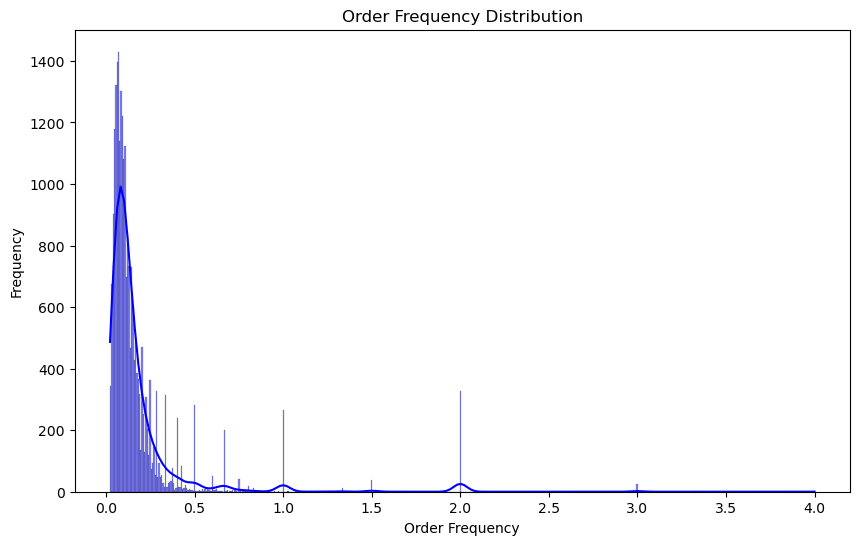

In [64]:
# plot the distribution of order frequency
plt.figure(figsize=(10, 6))
sns.histplot(order_freq.dropna(), kde=True, color='blue')
plt.title('Order Frequency Distribution')
plt.xlabel('Order Frequency')
plt.ylabel('Frequency')
plt.show()

### Order Frequency based on their Activity Period - Remarks
- Most customers place orders infrequently (close to 0).
- High concentration of customers with frequencies under 0.5, meaning that most customers, on average, place orders less than once every two days.
- Few customers order more frequently (with frequencies approaching 1 or higher).
- The occasional spikes above 1.0 and 2.0 likely represent very active customers who place multiple orders per day (power customers).

## Customer Segments

#### 1st Group: Did not order during the period

In [65]:
# see the description of the people who never ordered
df[df.loc[:,'DOW_0':'DOW_6'].sum(axis=1) == 0].describe()

,customer_age,vendor_count,product_count,is_chain,first_order,last_order,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23,total_amount_spent
count,138.000000,138.0,138.0,138.000000,138.000000,138.000000,138.0,138.0,138.0,138.0,138.0,138.0,138.0,138.0,138.0,138.0,138.0,138.0,138.0,138.0,138.0,138.0,138.0,138.0,138.0,138.0,138.0,138.0,138.0,138.0,138.0,138.0,138.0,138.0,138.0,138.0,138.0,138.0,138.0,138.0,138.0,138.0,138.0,138.0,138.0,138.0,138.0,138.0,138.0,138.0,138.0,138.0,138.0
mean,27.065217,0.0,0.0,0.543478,44.659420,44.659420,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,6.951560,0.0,0.0,0.499921,25.934645,25.934645,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,17.000000,0.0,0.0,0.000000,1.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,22.000000,0.0,0.0,0.000000,22.250000,22.250000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,26.000000,0.0,0.0,1.000000,44.000000,44.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,30.000000,0.0,0.0,1.000000,66.750000,66.750000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,55.000000,0.0,0.0,1.000000,89.000000,89.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### 1st Group - Remarks 
- Age lower than average and lower 'is_chain' than average.
- There are, unexpectedly, 75 non null values for 'is_chain' in this group, which might be wrong values

- For 'last_promo', the group has a higher tendency to use promotions than the whole dataset (while 53% of the overall customers never used any promotion, only 37% of this group never used any) - IS THIS BECAUSE CUSTOMERS IN THIS GROUP DO NOT HAVE A TENDENCY TO ORDER FOOD AND ONLY DO WHEN THEY HAVE A PROMOTION?
- Still for 'last_promo', customers in this group use more delivery and discount promotions than the whole dataset (34% against 20% and 20% against 14% respectively), but less freebies (9% against 14%)
- For 'payment_method', the group does not show such a clear favoritism for card as the whole dataset does(39% against 63%); cash and digi are more used in this group in comparison to the whole dataset (33% against 17% and 28% against 19% respectively)
- For customer_region, 100% of the customers in this group come from region '8'

In [66]:
# calculate and printthe percentage of customers in Region 2 who have zero orders for the week
print(f"Region 2: {round(df[(df.loc[:,'DOW_0':'DOW_6'].sum(axis=1) == 0) & ((df['customer_region'] == '2360') | (df['customer_region'] == '2440') | (df['customer_region'] == '2490'))]['customer_region'].value_counts().sum() / df[df.loc[:,'DOW_0':'DOW_6'].sum(axis=1) == 0]['customer_region'].value_counts().sum() * 100, 2)}%")

# do the same for region 4
print(f"Region 4: {round(df[(df.loc[:,'DOW_0':'DOW_6'].sum(axis=1) == 0) & ((df['customer_region'] == '4660') | (df['customer_region'] == '4140'))]['customer_region'].value_counts().sum() / df[df.loc[:,'DOW_0':'DOW_6'].sum(axis=1) == 0]['customer_region'].value_counts().sum() * 100, 2)}%")

# do the same for region 8
print(f"Region 8: {round(df[(df.loc[:,'DOW_0':'DOW_6'].sum(axis=1) == 0) & ((df['customer_region'] == '8670') | (df['customer_region'] == '8370') | (df['customer_region'] == '8550'))]['customer_region'].value_counts().sum() / df[df.loc[:,'DOW_0':'DOW_6'].sum(axis=1) == 0]['customer_region'].value_counts().sum() * 100, 2)}%")

Region 2: 0.0%
Region 4: 0.0%
Region 8: 100.0%


#### 2nd Group: Ordered the most during the period (top 10% values of the product count)

In [67]:
# calculate the 90th percentile of the 'product_count' column
percentile_90 = df['product_count'].quantile(0.9)

# filter the dataset to include only customers with a product count greater than or equal to the 90th percentile
df[df['product_count'] >= percentile_90].describe()

,customer_age,vendor_count,product_count,is_chain,first_order,last_order,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23,total_amount_spent
count,3475.000000,3564.000000,3564.000000,3564.000000,3564.000000,3564.000000,3564.000000,3564.000000,3564.000000,3564.000000,3564.000000,3564.000000,3564.000000,3564.000000,3564.000000,3564.000000,3564.000000,3564.000000,3564.000000,3564.000000,3564.000000,3564.000000,3564.000000,3564.000000,3564.000000,3564.000000,3564.000000,3564.000000,3243.0,3564.000000,3564.000000,3564.000000,3564.000000,3564.000000,3564.000000,3564.000000,3564.000000,3564.000000,3564.000000,3564.000000,3564.000000,3564.000000,3564.000000,3564.000000,3564.000000,3564.000000,3564.000000,3564.000000,3564.000000,3564.000000,3564.000000,3564.000000,3564.000000
mean,27.623885,8.399832,20.391975,9.852413,9.048822,81.803591,14.159776,28.926641,6.177062,4.191728,2.820219,6.114543,2.582407,3.314405,5.497096,10.195811,9.459708,2.993488,11.901305,10.964781,2.926299,2.000842,2.084736,2.128507,2.203984,2.243827,2.047419,2.272447,0.0,0.159091,0.178171,0.244669,0.243547,0.188833,0.180976,0.248036,0.501684,0.859708,1.216611,1.364759,1.167508,0.841751,0.740180,0.924804,1.149270,1.320988,1.226712,0.945847,0.545455,0.245230,0.170875,0.158530,122.225269
std,7.170259,4.336701,11.655565,7.719805,11.373528,9.374554,23.792813,52.003475,16.867094,17.313431,8.663703,21.447319,11.395622,13.685530,17.032212,26.092377,22.933639,11.248957,22.565934,33.300102,9.870892,1.852928,1.933820,1.879408,1.896768,1.897981,1.927466,2.133915,0.0,0.651602,0.736724,0.858931,0.846747,0.622777,0.620600,0.841783,1.605753,1.600752,1.957504,2.088003,1.825614,1.288646,1.213338,1.540350,1.786263,1.960513,1.950756,1.821886,1.369615,0.737449,0.652923,0.619958,84.664007
min,15.000000,1.000000,12.000000,0.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.860000
25%,23.000000,6.000000,14.000000,5.000000,2.000000,79.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,65.027500
50%,26.000000,8.000000,17.000000,9.000000,5.000000,85.000000,5.140000,5.945000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.110000,0.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,102.380000
75%,31.000000,10.000000,23.000000,13.000000,12.000000,88.000000,18.077500,36.512500,4.890000,0.000000,1.122500,4.080000,0.000000,0.000000,0.000000,7.005000,11.337500,0.000000,15.395000,0.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.00000

#### 2nd Group - Remarks

- Slightly higher age than the average, higher vendor_count than average (enjoys variety) and higher consumers of chain restaurants than average
- As expected, this group has a smaller than average gap between orders
- Show a huge preference for Asian cuisine, followed by the second favorite - American (with half the average spending); honerable mention to Other, Street Food/Snacks and Italian
- Constant consumption throughout the week, with all days having average orders in the house of 2,...; There seems to be a trend, form sunday to saturday, of increasing consumption, with the only exception being a slight decrease on friday
- Extremely similar distribution of orders per hour of the day to the whole dataset (although stonger at 11am)

- Last_promo: shares the most common value with the whole dataset ('-'), but the other values are inverted(from most to least common, we have_ freebie, discount, delivery) - there are more customers not using promos (66% against 53%), and, as a result, the percentages of customers using each type of promo are lower than in the whole dataset
- Customer_region: while the percentage of customers from region 4 seem to be consistent with the whole dataset, it is interesting to note that region 2 customers represent 44% of customers in this group, while they only represent 33% of the whole dataset; on the other hand, region 8 customers represent 22% of customers in this group, while they represent 32% of the whole dataset
- Payment_method: there is a higher tendency to use card (75% of customers in this group use card against only 63% in the whole dataset), and a lower tendency to use cash (11% of customers in this group use cash against 18% in the whole dataset)

In [68]:
# calculate and print the is_chain over average weekly order ratio for the whole dataset
print(f"Whole dataset: {2.819467/((df.loc[:,'DOW_0':'DOW_6'].sum()/31828).mean())}")

# calculate and print the is_chain over average weekly orde ratio for the group that ordered the most
print(f"Group that ordered the most: {9.852413/((df.loc[(df['product_count'] >= percentile_90), 'DOW_0':'DOW_6' ].sum()/3564).mean())}")

Whole dataset: 4.5174246676255265
Group that ordered the most: 4.603389821593782


##### 2nd Group subset - Ordered the most during the period by region


In [69]:
# calculate and print the percentage of customers in Region 2 who are in the top 10% of product counts
print(f"Region 2: {round(df[(df['product_count'] >= percentile_90) & ((df['customer_region'] == '2360') | (df['customer_region'] == '2440') | (df['customer_region'] == '2490'))]['customer_region'].value_counts().sum()/df[df['product_count'] >= percentile_90]['customer_region'].value_counts().sum()*100,2)}%")
# do the same for region 4
print(f"Region 4: {round(df[(df['product_count'] >= percentile_90) & ((df['customer_region'] == '4660') |  (df['customer_region'] == '4140'))]['customer_region'].value_counts().sum()/df[df['product_count'] >= percentile_90]['customer_region'].value_counts().sum()*100,2)}%")
# do the same for region 8
print(f"Region 8: {round(df[(df['product_count'] >= percentile_90) & ((df['customer_region'] == '8670') |  (df['customer_region'] == '8370') | (df['customer_region'] == '8550'))]['customer_region'].value_counts().sum()/df[df['product_count'] >= percentile_90]['customer_region'].value_counts().sum()*100,2)}%")

Region 2: 44.11%
Region 4: 32.6%
Region 8: 22.36%


### 3rd Group: Ordered the least during the period (bottom 10% values of the product count)

In [70]:
# calculate the 10th percentile of the 'product_count' column
percentile_10 = df[df['first_order'].notna()]['product_count'].quantile(0.1)

# filter the dataset to include only customers with a product count less than or equal to the 10th percentile
df[(df['product_count'] <= percentile_10)&(df.loc[:,'DOW_0':'DOW_6'].sum(axis=1) != 0)].describe()

,customer_age,vendor_count,product_count,is_chain,first_order,last_order,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23,total_amount_spent
count,4602.000000,4705.0,4705.000000,4705.000000,4626.000000,4705.00000,4705.000000,4705.000000,4705.000000,4705.000000,4705.000000,4705.000000,4705.000000,4705.000000,4705.000000,4705.000000,4705.000000,4705.000000,4705.000000,4705.000000,4705.000000,4705.000000,4705.000000,4705.000000,4705.000000,4705.000000,4705.000000,4705.000000,4655.0,4705.000000,4705.000000,4705.000000,4705.000000,4705.000000,4705.000000,4705.000000,4705.000000,4705.000000,4705.000000,4705.000000,4705.000000,4705.000000,4705.000000,4705.000000,4705.000000,4705.000000,4705.000000,4705.000000,4705.000000,4705.000000,4705.000000,4705.000000,4705.000000
mean,27.512821,1.0,0.996174,0.624655,46.680502,45.97577,1.386842,2.512918,0.653458,0.101911,0.161496,0.237012,0.288589,0.229443,0.490929,1.040230,0.902910,0.097211,0.583679,0.576414,0.176043,0.113284,0.112646,0.110521,0.124761,0.168757,0.185760,0.184272,0.0,0.015090,0.013603,0.032731,0.033581,0.025505,0.022104,0.020191,0.029118,0.047396,0.066312,0.079065,0.061424,0.046971,0.045484,0.072901,0.082465,0.099256,0.080340,0.048884,0.031031,0.014453,0.012965,0.008502,9.439084
std,7.231355,0.0,0.061741,0.484263,26.064551,26.56280,3.856367,5.644415,2.778831,1.033385,1.024484,1.602203,2.022347,1.722064,2.438785,3.256959,3.363166,0.769122,2.282301,2.910169,1.216586,0.316973,0.316193,0.313571,0.330483,0.374577,0.388954,0.387747,0.0,0.121925,0.115846,0.177951,0.180168,0.157669,0.147038,0.140669,0.168155,0.212508,0.248854,0.269869,0.240132,0.211600,0.208384,0.260002,0.275102,0.299037,0.271848,0.215649,0.173419,0.119360,0.113135,0.091821,5.695732
min,15.000000,1.0,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.370000
25%,22.000000,1.0,1.000000,0.000000,24.000000,22.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.180000
50%,26.000000,1.0,1.000000,1.000000,48.000000,47.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.520000
75%,31.000000,1.0,1.000000,1.000000,69.000000,69.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.740000
max,77.000000,1.0,1.000000,1.000000,90.000000,90.00000,24.390000

### 3rd Group - Remarks

- Average age is very close to the overall dataset average.
- ⁠Invariant vendor_count; all values = 1, lower than dataset average.
- ⁠Lower-than-average chain restaurant consumption.
- ⁠Close mean values for first_order and last_order show tendency to order once.
- ⁠Highest spending in Asian cuisine, followed by American; higher preference for Italian and Japanese, lower for "Other."
- ⁠Orders decrease from Sunday to Tuesday, increase midweek, peak on Friday, slight drop on Saturday.
- ⁠Similar hourly order distribution as the overall dataset.
- Last promo: Higher discount use (-: 34% vs. 53%), delivery (35% vs. 20%), discount (20% vs. 14%), freebies (12% vs. 14%).
- Payment method: Lower card use (42% vs. 63%), higher cash (35% vs. 18%), higher digi (24% vs. 19%).
- ⁠Region: Most customers in Region 4, followed by Regions 2 and 8

In [71]:
# calculate and print the is_chain over average weekly order ratio for the whole dataset
print(f"Whole dataset: {2.819467/((df.loc[:,'DOW_0':'DOW_6'].sum()/31828).mean())}")

# calculate and print the is_chain over average weekly orde ratio for the group that ordered the least
print(f"Group that ordered the least: {0.624655/((df.loc[(df['product_count'] <= percentile_10)&(df.loc[:,'DOW_0':'DOW_6'].sum(axis=1) != 0), 'DOW_0':'DOW_6' ].sum()/4705).mean())}")

Whole dataset: 4.5174246676255265
Group that ordered the least: 4.372585


In [72]:
# calculate and print the percentage of customers in Region 2 who are in the bottom 10% of product counts and have non-zero orders for the week
print(f"Region 2: {round(df[(df['product_count'] <= percentile_10)&(df.loc[:,'DOW_0':'DOW_6'].sum(axis=1) != 0) & ((df['customer_region'] == '2360') | (df['customer_region'] == '2440') | (df['customer_region'] == '2490'))]['customer_region'].value_counts().sum()/df[(df['product_count'] <= percentile_10)&(df.loc[:,'DOW_0':'DOW_6'].sum(axis=1) != 0)]['customer_region'].value_counts().sum()*100,2)}%")
# do the same for region 4
print(f"Region 4: {round(df[(df['product_count'] <= percentile_10)&(df.loc[:,'DOW_0':'DOW_6'].sum(axis=1) != 0) & ((df['customer_region'] == '4660') |  (df['customer_region'] == '4140'))]['customer_region'].value_counts().sum()/df[(df['product_count'] <= percentile_10)&(df.loc[:,'DOW_0':'DOW_6'].sum(axis=1) != 0)]['customer_region'].value_counts().sum()*100,2)}%")
# do the same for region 8
print(f"Region 8: {round(df[(df['product_count'] <= percentile_10)&(df.loc[:,'DOW_0':'DOW_6'].sum(axis=1) != 0) & ((df['customer_region'] == '8670') |  (df['customer_region'] == '8370') | (df['customer_region'] == '8550'))]['customer_region'].value_counts().sum()/df[(df['product_count'] <= percentile_10)&(df.loc[:,'DOW_0':'DOW_6'].sum(axis=1) != 0)]['customer_region'].value_counts().sum()*100,2)}%")

Region 2: 31.16%
Region 4: 35.96%
Region 8: 30.99%


In [73]:
# print the count of each payment method for customers in the bottom 10% of product counts who have non-zero orders for the week
print(df[(df['product_count'] <= percentile_10) & (df.loc[:,'DOW_0':'DOW_6'].sum(axis=1) != 0)]['payment_method'].value_counts())

# Print the total number of customers in the bottom 10% of product counts who have non-zero orders for the week
print(df[(df['product_count'] <= percentile_10) & (df.loc[:,'DOW_0':'DOW_6'].sum(axis=1) != 0)]['payment_method'].value_counts().sum())

# calculate and print the percentage of customers using a specific payment method
# 1966: Number of customers using a specific payment method
# 4705: Total number of customers in the bottom 10% of product counts who have non-zero orders for the week
# (1966 / 4705 * 100): percentage of customers using the specific payment method
print(1966 / 4705 * 100)

# calculate and print the percentage of customers using another specific payment method
# 1624: Number of customers using another specific payment method
# 4705: Total number of customers in the bottom 10% of product counts who have non-zero orders for the week
# (1624 / 4705 * 100): percentage of customers using the specific payment method
print(1624 / 4705 * 100)

# calculate and print the percentage of customers using yet another specific payment method
# 1115: Number of customers using yet another specific payment method
# 4705: Total number of customers in the bottom 10% of product counts who have non-zero orders for the week
# (1115 / 4705 * 100): percentage of customers using the specific payment method
print(1115 / 4705 * 100)

payment_method
CARD    1966
CASH    1624
DIGI    1115
Name: count, dtype: int64
4705
41.785334750265676
34.51647183846971
23.69819341126461


### New Feature

In [75]:
df['total_orders'] = df.loc[:,'DOW_0':'DOW_6'].sum(axis=1)

In [77]:
df.head()

,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23,customer_city,total_amount_spent,age_group,total_orders
customer_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1b8f824d5e,2360,18.0,2,5,1,0.0,1,DELIVERY,DIGI,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,28.88,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,2,28.88,0-20,2
5d272b9dcb,8670,17.0,2,2,2,0.0,1,DISCOUNT,DIGI,12.82,6.39,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,8,19.21,0-20,2
f6d1b2ba63,4660,38.0,1,2,2,0.0,1,DISCOUNT,CASH,9.20,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,4,9.20,31-40,2
180c632ed8,4660,NaN,2,3,1,0.0,2,DELIVERY,DIGI,0.00,13.70,0.0,0.0,0.0,0.0,0.0,0.0,17.86,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,4,31.56,NaN,2
4eb37a6705,4660,20.0,2,5,0,0.0,2,-,DIGI,14.57,40.87,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1,0.0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,55.44,0-20,2


Changes: 
- Seperate sections clearly (feature engineering specially)
- Visualize new features

Organize notebooks:
- 1st notebook will have EDA
- 2nd notebook will have preprocessing (don't forget visualizations and new interpretations of the features with fixed values)
(feature selection somewhere)
- 3rd noteboof will have clustering